# **Tugas Praktikum**
---

Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

### **Instruksi Umum**

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

### **Tugas 1 - Multiple Linear Regresion**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = 'data/insurance.csv'
datadf = pd.read_csv(data)

In [2]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
datadf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
datadf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [5]:
# Pisahkan fitur dan target
X = datadf[['age', 'sex', 'bmi', 'children', 'smoker']]
y = datadf['charges']

In [6]:
le = LabelEncoder() # membuat objek dari LabelEncoder
X.iloc[:, 1] = le.fit_transform(X.iloc[:, 1])  # Encoding kolom 'seX'
X.iloc[:, 4] = le.fit_transform(X.iloc[:, 4])  # Encoding kolom 'smoker'

In [7]:
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


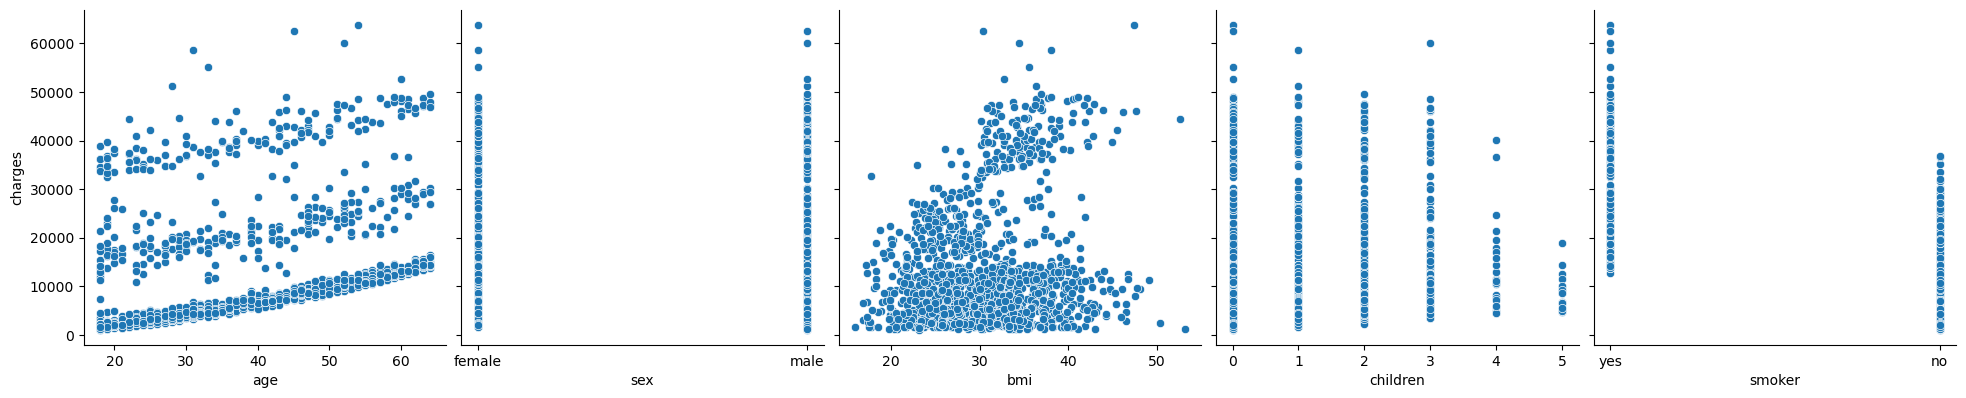

In [8]:
# visualisasi data dengan pairplot
sns.pairplot(datadf, x_vars=['age', 'sex', 'bmi', 'children', 'smoker'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [9]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

3. Lakukan feature scaling jika diperlukan.

In [18]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [19]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi linier
model = LinearRegression()


5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [24]:
# Melatih model menggunakan data latih
model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_scaled)

cek akurasi

In [26]:
accuracy= model.score(X_test_scaled, y_test)
print(accuracy)

0.7988664278143272


6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [28]:
import numpy as np

# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# y_actual = y 
y_pred = model.predict(X_test_scaled)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 3803.6187032048947
MSE: 27891767.534462985
RMSE: 5281.265713298563
R-squared: 0.7988664278143272


Visualisasi  data dengan menggunakan library matplotlib

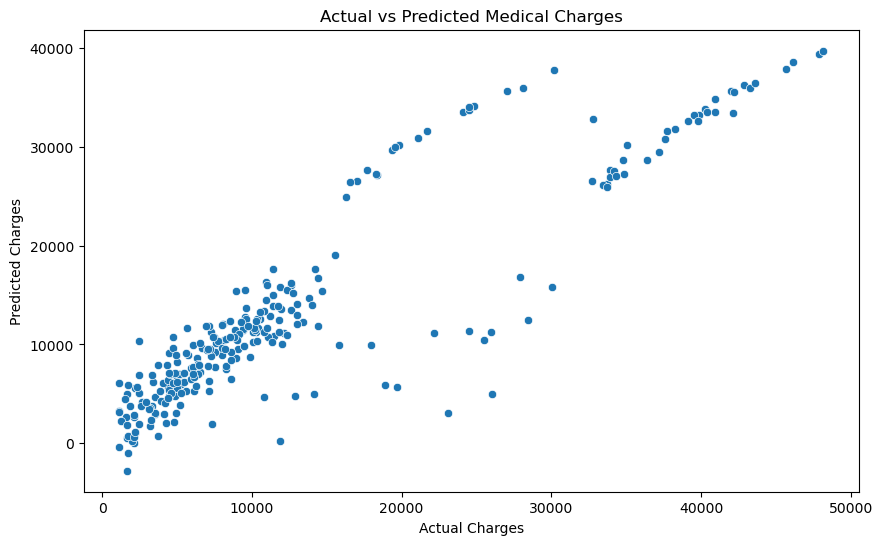

In [29]:
# Visualize the actual vs predicted charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Charges')
plt.show()

### **Catatan Tambahan**

1. Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.

    Berikut adalah beberapa faktor yang mempengaruhi berapa biaya premi asuransi kesehatan

    * Usia: Semakin tua usia, biasanya premi lebih mahal.
    * Jenis kelamin: Biaya premi bisa berbeda antara pria dan wanita.
    * BMI (Indeks Massa Tubuh): Mengukur apakah berat badan ideal dibandingkan tinggi badan. Nilai normalnya adalah antara 18,5 hingga 24,9.
    * Jumlah anak: Semakin banyak anak atau tanggungan, premi mungkin lebih tinggi.
    * Kebiasaan merokok: Jika seseorang merokok, biaya premi biasanya lebih mahal.
